In [1]:
%run load_mnist.py

#### Train

In [2]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### Test

In [3]:
y_test_pred = sgd_clf.predict(X_test)

#### Precision, Recall

In [4]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test_5, y_test_pred)

0.9297124600638977

In [5]:
recall_score(y_test_5, y_test_pred)

0.6524663677130045

#### F1

<img src="figs/f1.png" alt="Drawing" style="width: 500px;"/>

In [6]:
from sklearn.metrics import f1_score
f1_score(y_test_5, y_test_pred)

0.766798418972332

#### Precision-Recall Curve

In [7]:
from sklearn.metrics import precision_recall_curve

# probability estimates are not available for loss='hinge'
y_scores = sgd_clf.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)

In [8]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

<Figure size 640x480 with 1 Axes>

#### Pick a Threshold

In [9]:
y_test_pred_90 = (y_scores > 70000)

In [10]:
precision_score(y_test_5, y_test_pred_90)

0.9716312056737588

In [11]:
recall_score(y_test_5, y_test_pred_90)

0.460762331838565

##### ROC Curve

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)

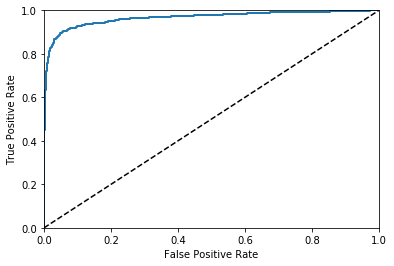

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_5, y_scores)

0.9659014595161992